# Importing required libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.preprocessing import label_binarize
from itertools import cycle
from imblearn.over_sampling import RandomOverSampler
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


# Loading the data

In [72]:
data  = pd.read_excel('Thyroid_data.xlsx')

In [73]:
data.shape

(3772, 30)

In [74]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


Problem Statement :  To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.

age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [75]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


# Exploratory Data Analysis

In [76]:
#Printing basic informaation about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [77]:
#checking for missing data
print(data.isnull().sum())

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64


Here it shows there is no null values in the table

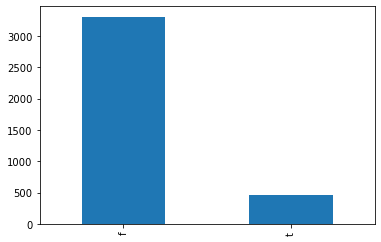

In [79]:
#Exploring data distribution
data['on_thyroxine'].value_counts().plot(kind='bar')
plt.show()

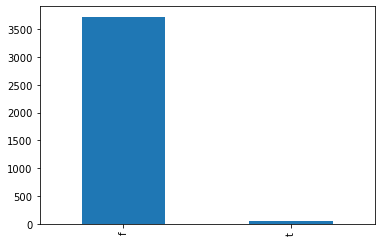

In [80]:
data['query_on_thyroxine'].value_counts().plot(kind='bar')
plt.show()

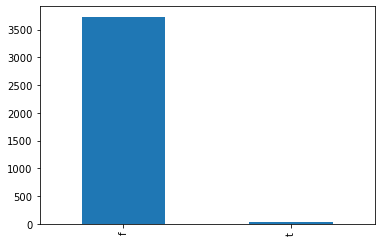

In [81]:
data['on_antithyroid_medication'].value_counts().plot(kind='bar')
plt.show()

# Data Preprocessing

We can see from the data description that there are no missing values. But if you checking the visualisation and the dataset the missing values are replaced with invalid values like '?'. Let's replace such values with 'nan' and check for missing values again.

In [82]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())
    

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


So these are the columns which have missing values but missing values are replaced with '?'. We will replace these values with 'nan' and then do imputation of these missing values. 

Also, we can see that for column 'TBG' all the values are missing. So will drop this column as it is of no use to us.

In [83]:
data = data.drop(['TBG'],axis =1)

Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

In [84]:
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

Let's drop such columns as well.

In [85]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [86]:
# Now let's replace the '?' values with numpy nan
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [87]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


Now that we have replaced all such values with 'nan'.

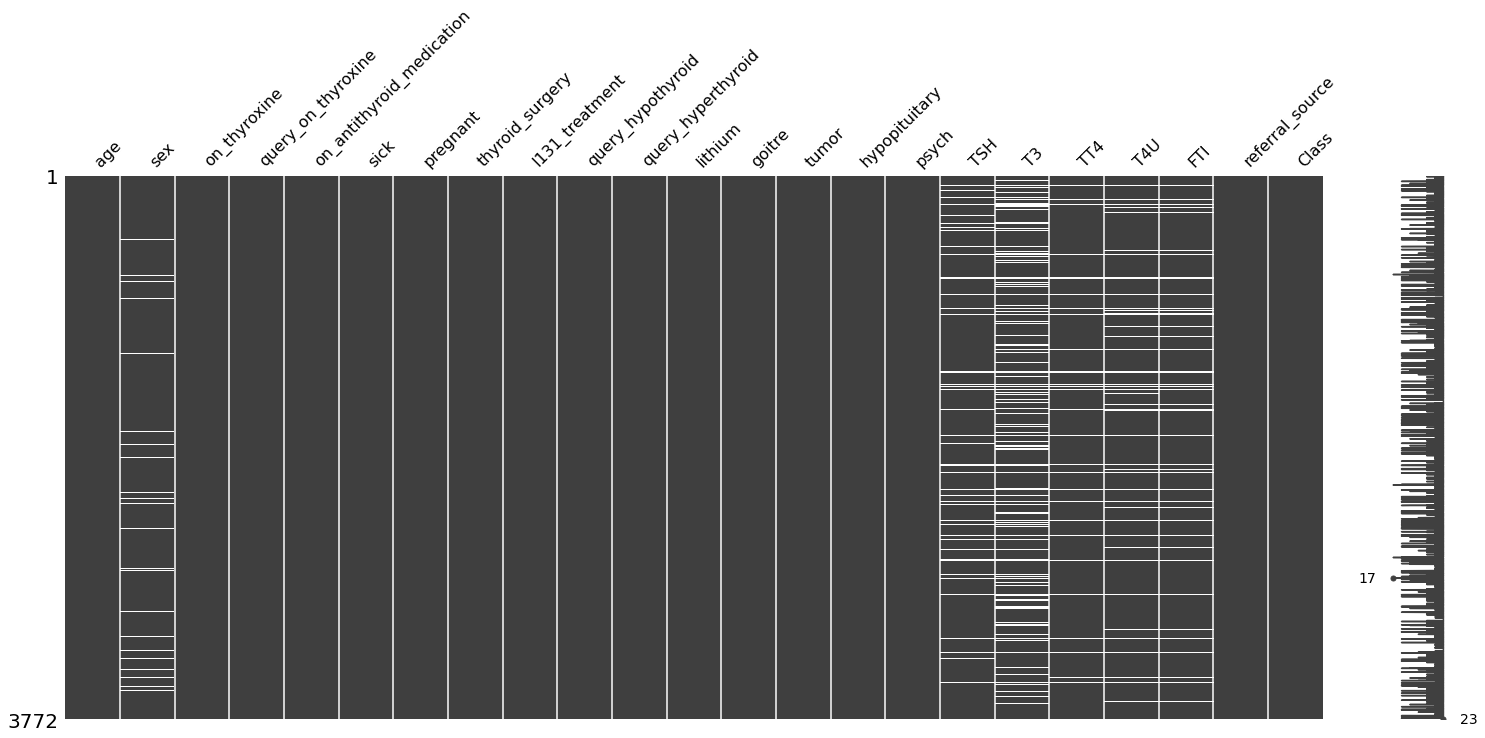

In [88]:
#visulization for checking the null values
msno.matrix(data)
plt.show()


From the above columns with white lines in the visualisation shows missing values. We can see that the columns sex,TSH,T3,TT4,T4U and FTI has null values. . Let's deal with these missing values now.

In [89]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them.Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns.
For columns with more than two categories we will use get dummies.

In [20]:
# We can map the categorical values like below:
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, let's do a smarter work
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns as we require. Now there are handful of column left with more than 2 categories. 


In [21]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [22]:
# we will use get_dummies with that.
data = pd.get_dummies(data, columns=['referral_source'])

Now our ouptut class also has 4 distinct categories. There is no sense of using get dummies with our Output class, so we will just map them.
Let's use LabelEncoder function for this.

In [23]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [24]:
lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [25]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0,0,0,0,0,0,0,0,...,2.5,125.0,1.14,109.0,1,0,1,0,0,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,2.0,102.0,NaN,NaN,1,0,0,0,0,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,NaN,109.0,0.91,120.0,1,0,0,0,0,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1.9,175.0,NaN,NaN,1,0,0,0,0,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1.2,61.0,0.87,70.0,1,0,0,0,1,0


In [26]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771.000000,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.013500,108.319345,0.995000,110.469649,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.084958,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.827434,35.604248,0.195457,33.089698,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050000,2.000000,0.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,88.000000,0.880000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,103.000000,0.980000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.400000,124.000000,1.080000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.600000,430.000000,2.320000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we have encoded all our Categorical values. Let's start with imputing the missing values.

In [27]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [28]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.026776,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.785086,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

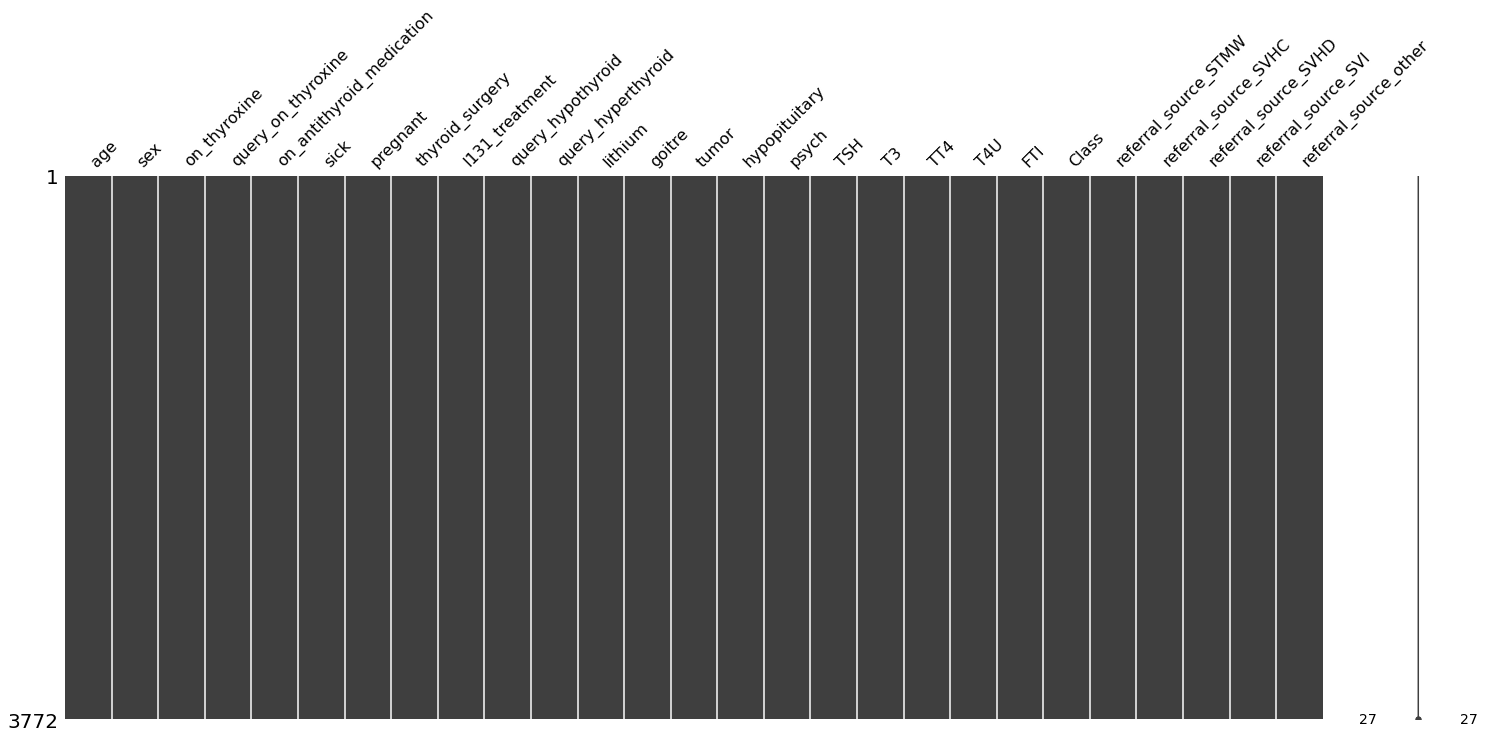

In [30]:
#Visualizing after removing null values
msno.matrix(new_data)
plt.show()

Now there are no missing values in our new dataset. 


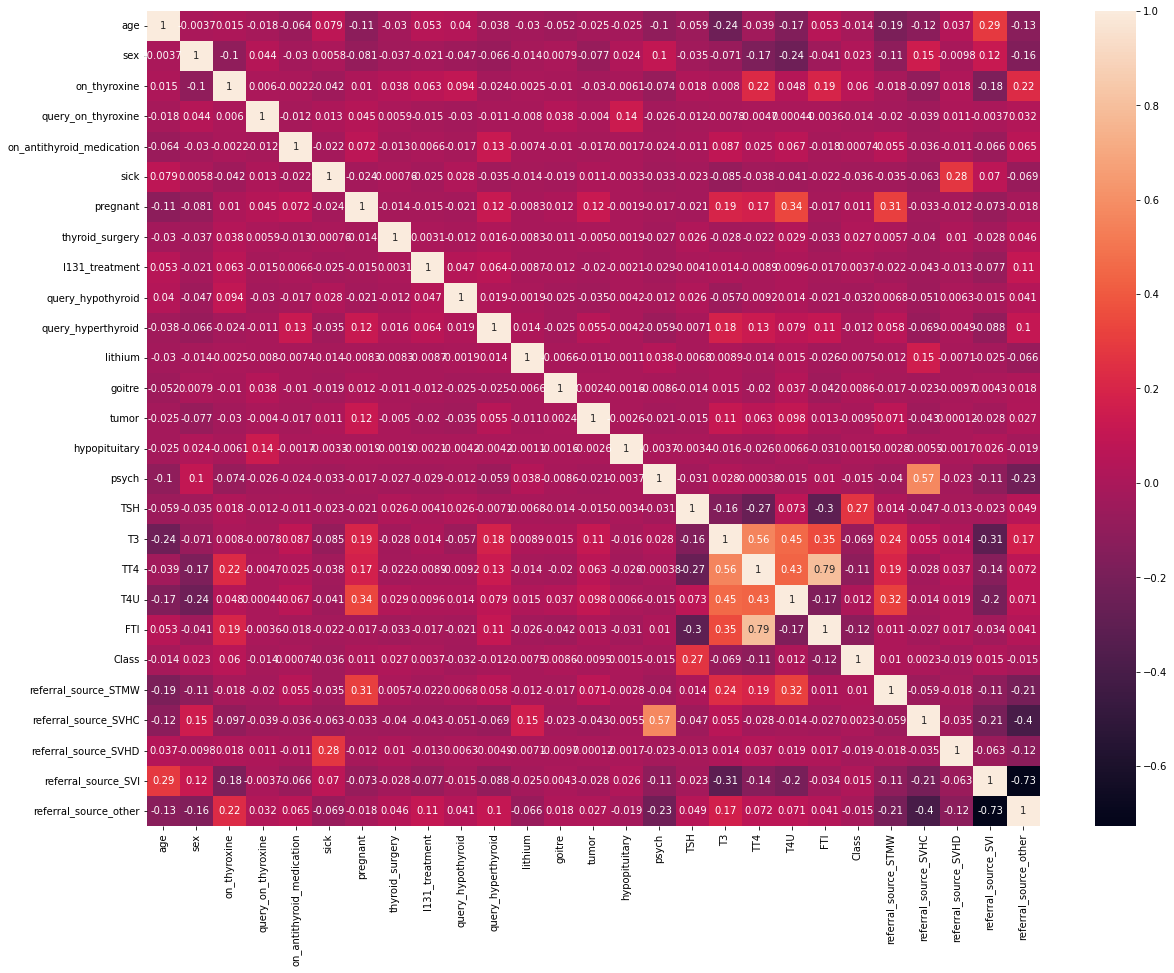

In [31]:
#Visualising correlation
corr_matrix = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Let's check the distribution for our continous data in the dataset:

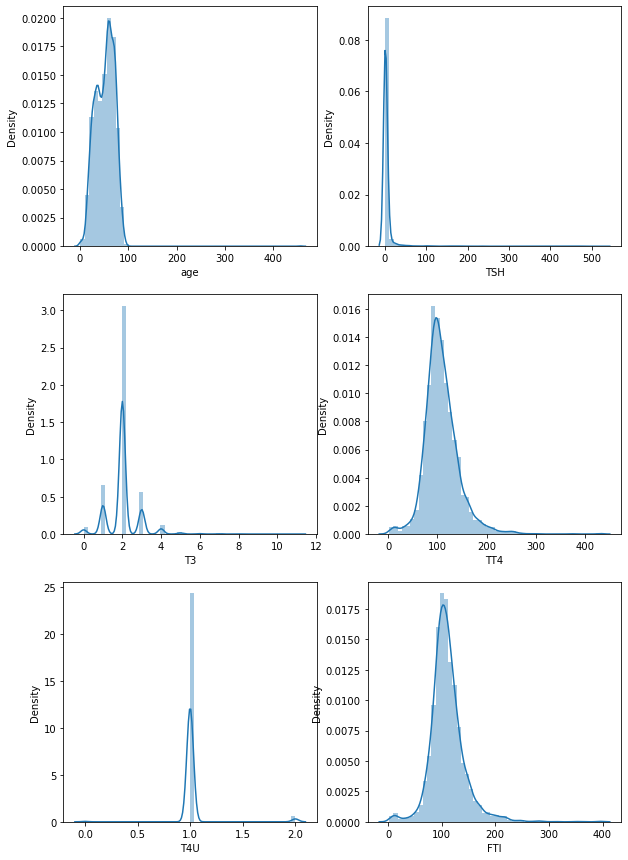

In [32]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

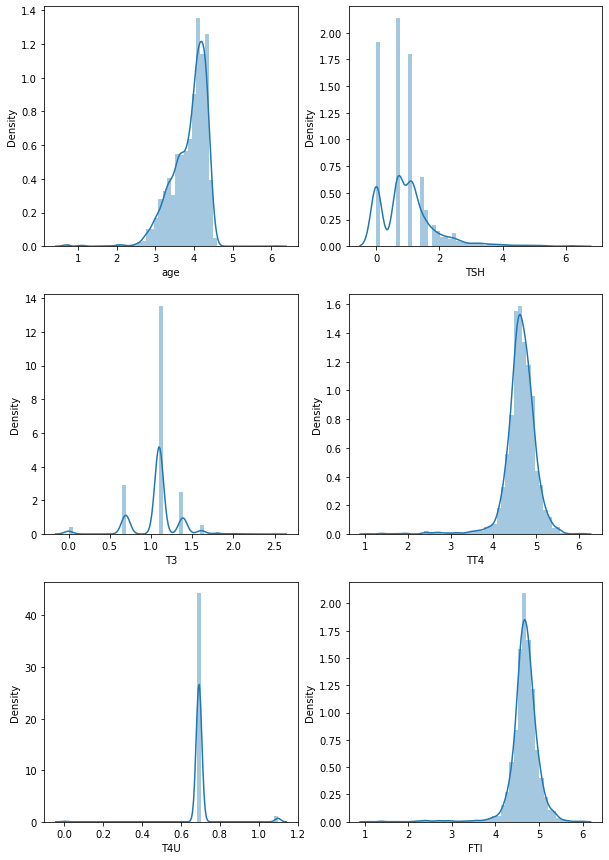

In [33]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [34]:
new_data = new_data.drop(['TSH'],axis=1)


#### let's see how balanced our dataset in terms of given target classes:

<AxesSubplot:xlabel='Class', ylabel='count'>

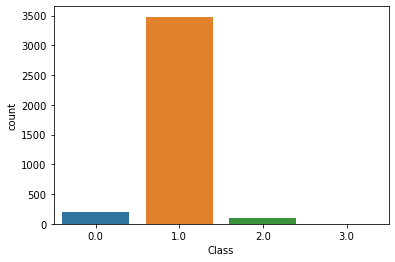

In [35]:
sns.countplot(new_data['Class'])
        
    

We can clerly see that the dataset is highly imbalanced. 

We will use a python library known as imbalanced-learn to deal with imbalanced data.
Imbalanced learn has an algorithm called RandomOverSampler. We will use different techniques in another projects. 
You can study more about different techniques below.

Note: https://pypi.org/project/imbalanced-learn/


In [36]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [37]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [38]:
x_sampled.shape

(13924, 25)

In [39]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [40]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13922,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='Class', ylabel='count'>

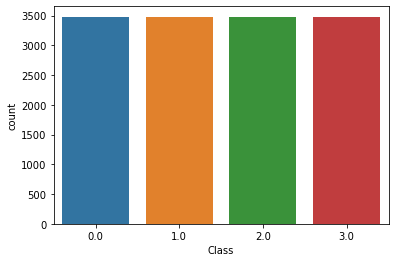

In [41]:
sns.countplot(y_sampled)       
    

Now dataset looks balanced now. We can go ahead with training our model on this data.

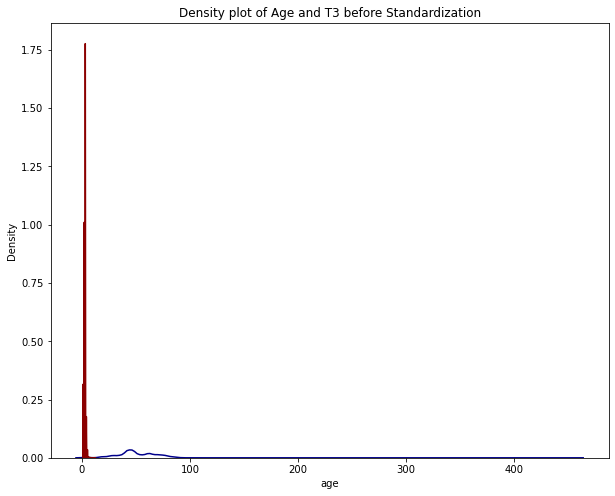

In [42]:
#Visualising the effects of standardization

plt.figure(figsize=(10, 8))
sns.kdeplot(x_sampled['age'], color='darkblue')
sns.kdeplot(x_sampled['T3'], color='darkred')
plt.title('Density plot of Age and T3 before Standardization')
plt.show()

# Train Test Split and Standardization


Let's begin by splitting the data into a training set and a test set. We'll use 70% of the data for training and 30% for testing. We'll also standardize the features. We can use the train_test_split function from sklearn.model_selection and StandardScaler from sklearn.preprocessing to achieve this.

Now we will proceed with model selection. We will be using the following classification models:

1.Logistic Regression
2.K-Nearest Neighbors
3.Support Vector Classifier
4.Decision Tree Classifier
5.Random Forest Classifier

We'll fit these models to our training data and use 5-fold cross-validation to assess their performance. We will tune the models using grid search. The performance will be evaluated based on the accuracy score, but other metrics such as precision, recall, and the F1 score can be used as well.

Finally, we will choose the model that performs the best on the validation data.

Let's start by importing the necessary libraries and splitting the data.



In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [44]:
# training logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#make predictions
y_pred = model.predict(X_test_scaled)

#evaluvating the model
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.8130684538056486
Confusion Matrix on Test Set:
 [[ 719  276   59   19]
 [ 332  678   15    7]
 [  28   24  955   21]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      1073
         1.0       0.69      0.66      0.67      1032
         2.0       0.93      0.93      0.93      1028
         3.0       0.96      1.00      0.98      1045

    accuracy                           0.81      4178
   macro avg       0.81      0.81      0.81      4178
weighted avg       0.81      0.81      0.81      4178



In [45]:
# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluate the model
print("K-Nearest Neighbors")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Accuracy on Test Set: 0.9514121589277166
Confusion Matrix on Test Set:
 [[1073    0    0    0]
 [ 190  829   12    1]
 [   0    0 1028    0]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1073
         1.0       1.00      0.80      0.89      1032
         2.0       0.99      1.00      0.99      1028
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.95      4178
   macro avg       0.96      0.95      0.95      4178
weighted avg       0.96      0.95      0.95      4178



In [46]:
# Support Vector Classifier
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = model_svc.predict(X_test_scaled)

# Evaluate the model
print("Support Vector Classifier")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_svc))


Support Vector Classifier
Accuracy on Test Set: 0.8626136907611297
Confusion Matrix on Test Set:
 [[ 904  148   21    0]
 [ 350  675    7    0]
 [  16   11  980   21]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77      1073
         1.0       0.81      0.65      0.72      1032
         2.0       0.97      0.95      0.96      1028
         3.0       0.98      1.00      0.99      1045

    accuracy                           0.86      4178
   macro avg       0.87      0.86      0.86      4178
weighted avg       0.87      0.86      0.86      4178



In [47]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Classifier")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_dt))


Decision Tree Classifier
Accuracy on Test Set: 0.982048827190043
Confusion Matrix on Test Set:
 [[1073    0    0    0]
 [  70  957    5    0]
 [   0    0 1028    0]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1073
         1.0       1.00      0.93      0.96      1032
         2.0       1.00      1.00      1.00      1028
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.98      4178
   macro avg       0.98      0.98      0.98      4178
weighted avg       0.98      0.98      0.98      4178



In [48]:
# Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy on Test Set: 0.9913834370512207
Confusion Matrix on Test Set:
 [[1073    0    0    0]
 [  28  996    8    0]
 [   0    0 1028    0]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1073
         1.0       1.00      0.97      0.98      1032
         2.0       0.99      1.00      1.00      1028
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.99      4178
   macro avg       0.99      0.99      0.99      4178
weighted avg       0.99      0.99      0.99      4178



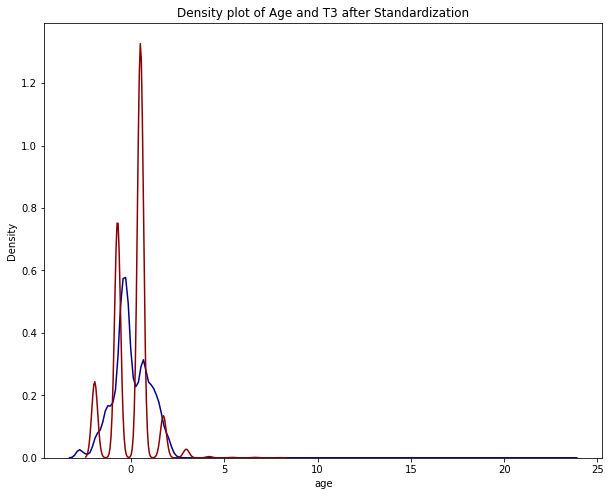

In [49]:
# Visualizing the Effects of Standardization

# Convert the numpy arrays back to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Then plotting as before
plt.figure(figsize=(10, 8))
sns.kdeplot(X_train_scaled['age'], color='darkblue')
sns.kdeplot(X_train_scaled['T3'], color='darkred')
plt.title('Density plot of Age and T3 after Standardization')
plt.show()


# Model building and evaluation

Next, we will fit the models to our training data and perform hyperparameter tuning.
After selecting the best model, we can evaluate its performance on the test set.

In [50]:
# Initialize maximum score for cross-validation
max_score = 0

# Placeholder for best model and its details
best_model = None
best_model_params = None
best_model_name = None

# Define classifiers and their respective parameters
classifiers = [
    ("LR", LogisticRegression(), {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}),
    ("KNN", KNeighborsClassifier(), {"n_neighbors": range(1, 10), "weights": ["uniform", "distance"]}),
    ("SVC", SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": ["scale", "auto"]}),
    ("DT", DecisionTreeClassifier(), {"criterion": ["gini", "entropy"], "max_depth": range(1, 10)}),
    ("RF", RandomForestClassifier(), {"n_estimators": [100, 200], "criterion": ["gini", "entropy"], "max_depth": range(1, 10)})
]

# Performing grid search and cross-validation
for clf_name, clf, clf_params in classifiers:
    grid_search = GridSearchCV(estimator=clf, param_grid=clf_params, scoring='accuracy', cv=5, n_jobs=1)
    grid_search.fit(X_train_scaled, y_train)
    if grid_search.best_score_ > max_score:
        max_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_model_params = grid_search.best_params_
        best_model_name = clf_name

    print(f"{clf_name} Best Params: {grid_search.best_params_}")
    print(f"{clf_name} Best Score: {grid_search.best_score_}\n")

# Print best model details
print(f"Best Model: {best_model_name}")
print(f"Best Params: {best_model_params}")
print(f"Best Score: {max_score}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)

# Print test set performance metrics
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred))
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

LR Best Params: {'C': 10, 'penalty': 'l2'}
LR Best Score: 0.8179778189998815

KNN Best Params: {'n_neighbors': 1, 'weights': 'uniform'}
KNN Best Score: 0.9797864519609005

SVC Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Best Score: 0.8866217258028442

DT Best Params: {'criterion': 'gini', 'max_depth': 9}
DT Best Score: 0.8868254857849523

RF Best Params: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
RF Best Score: 0.91227227638105

Best Model: KNN
Best Params: {'n_neighbors': 1, 'weights': 'uniform'}
Best Score: 0.9797864519609005
Accuracy on Test Set: 0.9822881761608425
Confusion Matrix on Test Set:
 [[1073    0    0    0]
 [  69  958    5    0]
 [   0    0 1028    0]
 [   0    0    0 1045]]
Classification Report on Test Set:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1073
         1.0       1.00      0.93      0.96      1032
         2.0       1.00      1.00      1.00      1028
         3.

ROC CURVE

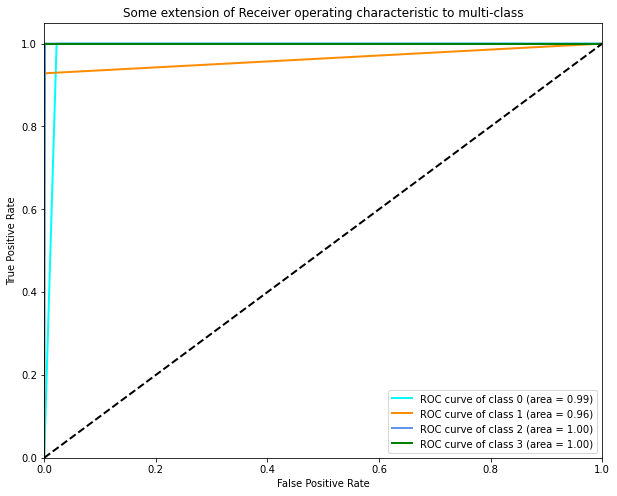

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Get unique classes
classes = np.unique(y)

# Binarize the output
y_bin = label_binarize(y_test, classes=classes)
n_classes = y_bin.shape[1]

# Learn to predict each class against the other
y_score = best_model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


CONFUSION MATRIX

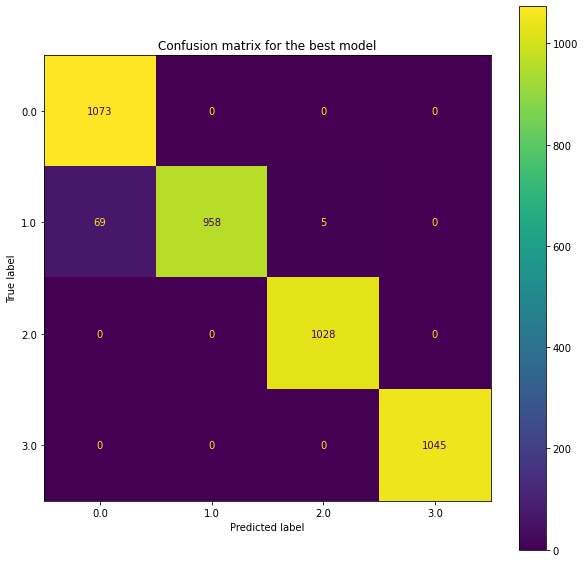

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the classes
y_pred = best_model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title('Confusion matrix for the best model')
plt.show()


PRECISION RECALL CURVE

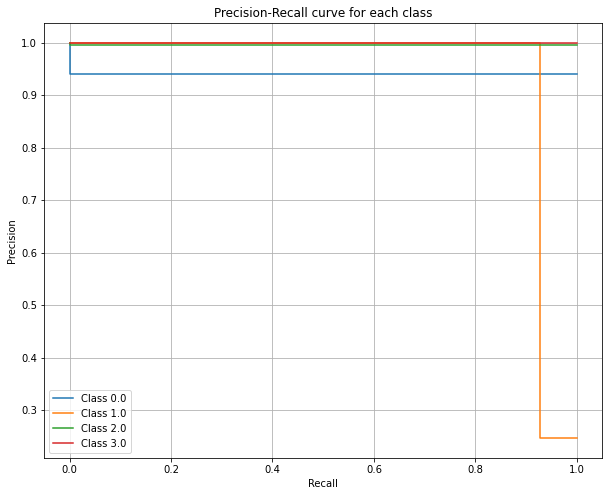

In [53]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=classes)
y_score = best_model.predict_proba(X_test_scaled)

# For each class
precision = dict()
recall = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])

# Plot the Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    disp = PrecisionRecallDisplay(precision=precision[i], recall=recall[i])
    disp.plot(ax=plt.gca(), label=f'Class {classes[i]}')

plt.title('Precision-Recall curve for each class')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()
